Temporal Analysis
-----------------

Following the general analysis. Here we will see various measures over the years.

In this notebook:
- 2.Temporal Analysis

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

%matplotlib inline

In [3]:
font = {'size'   : 10,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [4]:
df = pd.read_json('../data/data_nov_2017_clean.json')

In [5]:
size = len(df['unique_key'].unique())

**see if articles have been collected contiously over the years.**

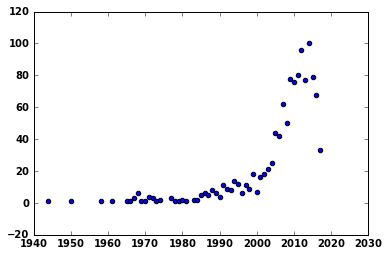

In [15]:
yearly_df = df.groupby(['unique_key', 'date']).size().reset_index().groupby('date').size()
plt.scatter(yearly_df.index, yearly_df);

In the general analysis section we looked at the number of articles collected from each journal and wheather they have been added manually.

In Figure Provenance the number of articles collected per year and per API are illustrated. Springer seems to have a continuous contribution on the data set from 1996 up to 2016. The total number of articles collected from Springer per year do not exceed 30. On the other hand, IEEE and arXiv, where both have a significant contribution to the data set, seem to have articles on the IPD only after the 2000s. Finally, both Nature and PLOS with a small significant contribution appear after the 2010s.

In [16]:
prov_df = df.groupby(['unique_key','provenance', 'date']).size().reset_index().groupby(['provenance', 'date']).size()

In [29]:
colors = iter(matplotlib.cm.plasma(np.linspace(0, 1, 6)))
linestyles = [':', '--', '-', '--', '-', '--']

In [30]:
c = list(colors)

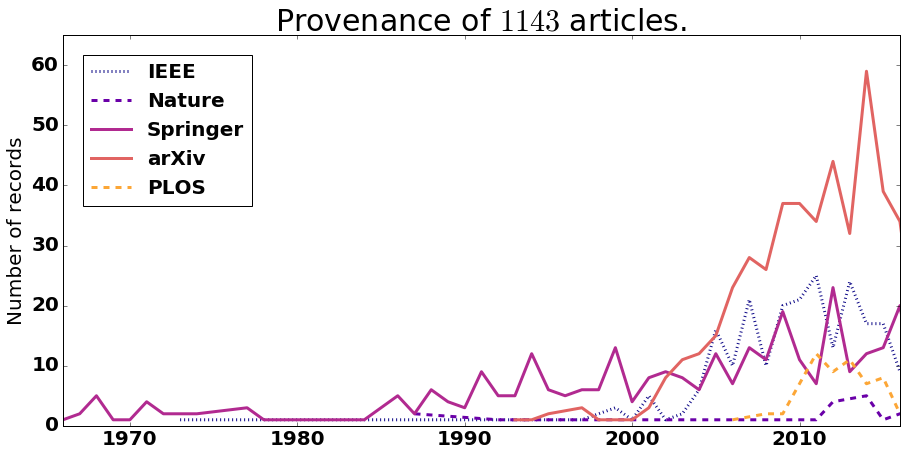

In [31]:
fig = plt.figure(figsize=(15, 7))

plt.title('Provenance of ${}$ articles.'.format(size), fontsize=30)
plt.ylabel('Number of records', fontsize=20); plt.ylim([0, 65]); plt.yticks(fontsize=20)
plt.xticks(fontsize=20); plt.xlim(1966,2016)
    
plt.plot(prov_df['IEEE'], linestyle=linestyles[0], label="IEEE", linewidth=3, c=c[0])
plt.plot(prov_df['Nature'], linestyle=linestyles[1],label="Nature", linewidth=3, c=c[1])
plt.plot(prov_df['Springer'], label="Springer", linewidth=3, linestyle=linestyles[2], c=c[2])
plt.plot(prov_df['arXiv'], linestyle=linestyles[4], label="arXiv", linewidth=3, c=c[3])
plt.plot(prov_df['PLOS'], linestyle=linestyles[5],label="PLOS", linewidth=3, c=c[4])

plt.legend(loc=2, borderaxespad=1, fontsize=20)
#plt.show()
plt.savefig("/home/nightwing/rsc/Literature-Article/assets/images/provenance.pdf", bbox_inches='tight')

Addittionaly, the total number of articles per year have been plotted regadless the provenance. Figure Articles per Year, illustrates the timeseries. It is shown that there is a steady increase in the number of articles until 2000 where a steep increase is spotted. There seems to be a pick at the year of 2014 and a decrease from 2016 onwards. That is due the fact that the data have been collected at the end of 2016.

In [32]:
label = []
for y in range(min(yearly_df.index), max(yearly_df.index + 1)):
    if y%10 == 0:
        label.append(y)
    else:
        label.append(None)

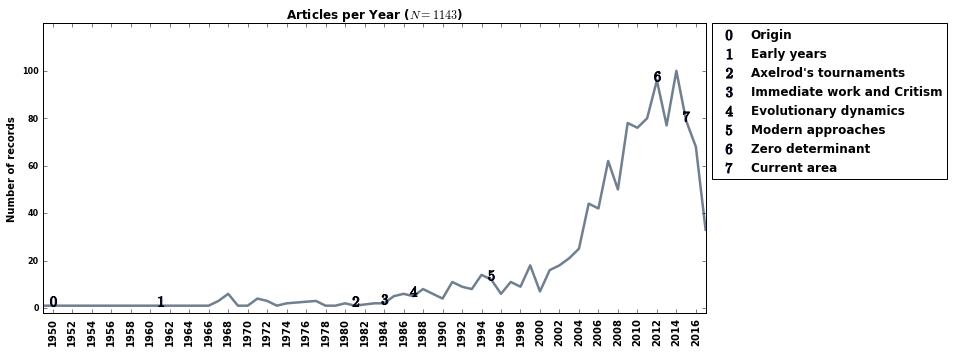

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.title('Articles per Year ($N={}$)'.format(size), fontweight='bold');plt.ylabel('Number of records', fontweight='bold')
ax.plot(yearly_df, color='slategray', zorder=1, linewidth=2.5)
plt.xticks(fontsize=10); plt.yticks(fontsize=8)

colors = iter(matplotlib.cm.viridis(np.linspace(0, 1, 15)))
milestones = [1950, 1961, 1981, 1984, 1987, 1995, 2012, 2015]
labels = ['Origin', "Early years", "Axelrod's tournaments", 
          "Immediate work and Critism", "Evolutionary dynamics", 
          "Modern approaches", "Zero determinant", "Current area"]
height = [yearly_df[yearly_df.index == y].values for y in milestones]

height = [yearly_df[yearly_df.index == y].values for y in milestones]

for i, m in enumerate(milestones):
    h = yearly_df[yearly_df.index == m].values
#     c = next(colors)
    ax.scatter(m, (h + 2), marker="${}$".format(i), s=100, zorder=2, label=labels[i]);
    #ax.annotate(i, color=c, xy=(m, h), fontsize=100, fontweight='bold', zorder=2)

x = yearly_df.index
y = yearly_df.values

ax.set_yticks(np.arange(min(y) - 1, max(y)+1, 20.0))
ax.set_xticks(np.arange(min(x), max(x)+1, 2.0))
ax.set_ylim(ymin=-2)
ax.set_xlim(xmin=1949, xmax=2017)
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., scatterpoints=1);
plt.savefig("/home/nightwing/rsc/Literature-Article/assets/images/timeline.pdf",
           format='pdf', bbox_inches='tight')